# ETH Mining Reward with 3x RTX 3090s in EZIL Pool
**Data Period: June 1, 2021 to April 30, 2022**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

### Load Data

In [3]:
df = pd.read_csv('./input/jun21_apr22_reward.csv')

### Exploratory Data Analysis

#### Check Data Type and Missing Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    318 non-null    object 
 1   Hashrate(MHs)           318 non-null    float64
 2   Pool variance           318 non-null    float64
 3   ETH reward              318 non-null    float64
 4   ZIL reward              318 non-null    float64
 5   Total reward in ETH     318 non-null    float64
 6   Total reward in USD     318 non-null    float64
 7   Income per 1GHs in ETH  318 non-null    float64
 8   Income per 1GHs in USD  318 non-null    float64
dtypes: float64(8), object(1)
memory usage: 22.5+ KB


#### Change Date data type to date 

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

#### Rename columns

In [6]:
df.columns = ['date','mhs', 'pool_variance','eth_reward','zil_reward','total_reward_eth','total_reward_usd',
              'income_per_1ghs_eth','income_per_1ghs_usd']

In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [8]:
df.sort_values(by='date').head()

,date,mhs,pool_variance,eth_reward,zil_reward,total_reward_eth,total_reward_usd,income_per_1ghs_eth,income_per_1ghs_usd,year,month,day
317,2021-06-02,18.29,95.85,0.000529,0.2193,0.000539,1.45,0.02948,79.53,2021,6,2
316,2021-06-05,37.78,99.03,0.000957,0.5494,0.000982,2.53,0.02599,66.94,2021,6,5
315,2021-06-17,274.80,120.84,0.007239,1.9046,0.007322,17.28,0.02665,62.88,2021,6,17
314,2021-06-18,382.17,92.80,0.009668,9.9660,0.010097,22.39,0.02642,58.57,2021,6,18
313,2021-06-19,378.25,123.01,0.009503,9.7106,0.009920,21.61,0.02623,57.13,2021,6,19


I started mining with 3x RTX 3090s in 18 June, 2021, so we will delete the first three records.

In [9]:
df = df[df['date']>= '2021-06-18'].sort_values(by='date')

#### Get Summary Statistics 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mhs,315.0,350.801524,31.137651,61.640000,352.200000,355.980000,359.975000,385.550000
pool_variance,315.0,102.300127,10.553662,74.280000,95.240000,101.140000,108.440000,139.180000
eth_reward,315.0,0.006598,0.002197,0.001826,0.004889,0.005876,0.007593,0.014394
zil_reward,315.0,9.690435,2.503028,0.000000,8.228050,9.470300,11.137450,28.317500
total_reward_eth,315.0,0.006846,0.002251,0.001911,0.005100,0.006110,0.007860,0.014769
total_reward_usd,315.0,21.523175,6.300359,4.220000,15.330000,22.350000,26.280000,47.870000
income_per_1ghs_eth,315.0,0.019566,0.006134,0.012730,0.014625,0.017400,0.022775,0.038780
income_per_1ghs_usd,315.0,61.266190,16.675534,34.260000,44.670000,63.250000,74.115000,132.620000
year,315.0,2021.374603,0.484790,2021.000000,2021.000000,2021.000000,2022.000000,2022.000000
month,315.0,6.733333,3.660601,1.000000,3.000000,7.000000,10.000000,12.000000


#### Return on Investement 

In [11]:
str(round((10000/df['total_reward_usd'].mean()),2))+' days'

'464.62 days'

#### Check Highest Daily Reward in USD and ETH

In [12]:
df['total_reward_usd'].max()

47.87

In [13]:
df['total_reward_eth'].max()

0.014769

#### Daily Reward in USD > Daily Average Reward in USD

In [14]:
df[df['total_reward_usd']>=df['total_reward_usd'].mean()].sort_values(by=['total_reward_usd','date'], ascending=[False, True])

,date,mhs,pool_variance,eth_reward,zil_reward,total_reward_eth,total_reward_usd,income_per_1ghs_eth,income_per_1ghs_usd,year,month,day
239,2021-09-01,360.95,106.30,0.012417,9.8513,0.012717,47.87,0.03523,132.62,2021,9,1
227,2021-09-13,357.37,100.83,0.012035,9.6595,0.012339,40.57,0.03453,113.51,2021,9,13
256,2021-08-15,354.83,115.24,0.010323,12.0849,0.010736,35.49,0.03026,100.02,2021,8,15
243,2021-08-28,348.52,112.34,0.009613,10.2470,0.009970,32.26,0.02861,92.56,2021,8,28
182,2021-10-28,356.42,90.40,0.007330,9.6111,0.007550,32.11,0.02118,90.10,2021,10,28
...,...,...,...,...,...,...,...,...,...,...,...,...
292,2021-07-10,357.22,78.59,0.009995,8.1015,0.010273,21.72,0.02876,60.81,2021,7,10
128,2021-12-21,361.79,96.19,0.005179,12.1281,0.005369,21.62,0.01484,59.76,2021,12,21
313,2021-06-19,378.25,123.01,0.009503,9.7106,0.009920,21.61,0.02623,57.13,2021,6,19
220,2021-09-20,353.19,127.15,0.006801,14.1345,0.007216,21.59,0.02043,61.14,2021,9,20


#### Daily Reward in ETH > Daily Average Reward in ETH

In [15]:
df[df['total_reward_eth'] > df['total_reward_eth'].mean()].sort_values(by=['total_reward_eth', 'date'], ascending=[False, True])

,date,mhs,pool_variance,eth_reward,zil_reward,total_reward_eth,total_reward_usd,income_per_1ghs_eth,income_per_1ghs_usd,year,month,day
310,2021-06-22,380.83,97.01,0.014394,10.2673,0.014769,27.90,0.03878,73.25,2021,6,22
275,2021-07-27,357.22,95.33,0.012689,13.0796,0.013122,30.15,0.03673,84.39,2021,7,27
239,2021-09-01,360.95,106.30,0.012417,9.8513,0.012717,47.87,0.03523,132.62,2021,9,1
311,2021-06-21,380.58,99.77,0.011999,10.8507,0.012417,23.23,0.03263,61.05,2021,6,21
305,2021-06-27,367.41,88.44,0.012030,10.5469,0.012415,24.27,0.03379,66.06,2021,6,27
...,...,...,...,...,...,...,...,...,...,...,...,...
206,2021-10-04,348.32,104.49,0.006696,7.9182,0.006924,23.37,0.01988,67.10,2021,10,4
211,2021-09-29,358.36,122.55,0.006671,8.1673,0.006907,19.59,0.01927,54.68,2021,9,29
176,2021-11-03,357.86,101.94,0.006660,9.8873,0.006896,31.68,0.01927,88.53,2021,11,3
193,2021-10-17,365.17,96.66,0.006689,7.9982,0.006883,26.35,0.01885,72.16,2021,10,17


#### Binning Data for Total Reward in USD

In [16]:
# We will create 5 bins based on total_reward_usd
df['bucket_usd']= pd.qcut(df['total_reward_usd'], q=5, precision=0)
df['bucket_category_usd']= pd.qcut(df['total_reward_usd'], q=5,labels=False, precision=0)
df['category_usd']= pd.qcut(df['total_reward_usd'], q=5, labels=['Very Low','Low', 'Medium', 
                                                                                'High','Very High'], precision=0)

In [17]:
df[['bucket_usd','bucket_category_usd','category_usd']].value_counts().reset_index().sort_values(by='bucket_category_usd',
                                                                                            ascending=True)

,bucket_usd,bucket_category_usd,category_usd,0
0,"(3.0, 15.0]",0,Very Low,63
1,"(15.0, 21.0]",1,Low,63
2,"(21.0, 24.0]",2,Medium,63
3,"(24.0, 27.0]",3,High,63
4,"(27.0, 48.0]",4,Very High,63


#### Binning Data for Total Reward in ETH

In [18]:
# We will create 5 bins based on total_reward_eth
df['bucket_eth']= pd.qcut(df['total_reward_eth'], q=5, precision=0)
df['bucket_category_eth']= pd.qcut(df['total_reward_eth'], q=5,labels=False, precision=0)
df['category_eth']= pd.qcut(df['total_reward_eth'], q=5, labels=['Very Low','Low', 'Medium', 
                                                                                'High','Very High'], precision=0)

In [19]:
df[['bucket_eth','bucket_category_eth','category_eth']].value_counts().reset_index().sort_values(by='bucket_category_eth',
                                                                                            ascending=True)

,bucket_eth,bucket_category_eth,category_eth,0
0,"(-0.098, 0.005]",0,Very Low,63
1,"(0.005, 0.006]",1,Low,63
2,"(0.006, 0.007]",2,Medium,63
3,"(0.007, 0.009]",3,High,63
4,"(0.009, 0.01]",4,Very High,63


In [20]:
df[df['bucket_category_eth']==0].sort_values(by='bucket_category_eth').head()

,date,mhs,pool_variance,eth_reward,zil_reward,total_reward_eth,total_reward_usd,income_per_1ghs_eth,income_per_1ghs_usd,year,month,day,bucket_usd,bucket_category_usd,category_usd,bucket_eth,bucket_category_eth,category_eth
299,2021-07-03,61.64,123.39,0.001826,2.3069,0.001911,4.22,0.03100,68.39,2021,7,3,"(3.0, 15.0]",0,Very Low,"(-0.098, 0.005]",0,Very Low
46,2022-03-15,326.65,104.86,0.004617,9.9705,0.004767,12.51,0.01460,38.31,2022,3,15,"(3.0, 15.0]",0,Very Low,"(-0.098, 0.005]",0,Very Low
45,2022-03-16,336.74,95.09,0.004453,8.5387,0.004578,12.58,0.01360,37.35,2022,3,16,"(3.0, 15.0]",0,Very Low,"(-0.098, 0.005]",0,Very Low
42,2022-03-19,296.12,94.65,0.003873,8.8220,0.004004,11.73,0.01352,39.62,2022,3,19,"(3.0, 15.0]",0,Very Low,"(-0.098, 0.005]",0,Very Low
41,2022-03-20,354.48,118.86,0.004686,9.9181,0.004834,13.91,0.01364,39.23,2022,3,20,"(3.0, 15.0]",0,Very Low,"(-0.098, 0.005]",0,Very Low


#### ETH price is at a good price (in USD) while ETH mining reward is very low 

In [21]:
df[(df['bucket_category_eth']==0) & (df['bucket_category_usd']!=0)].sort_values(by=['bucket_category_usd',
                                                                                        'total_reward_usd'], 
                                                                                        ascending=False)[[
    'date','total_reward_eth','total_reward_usd',
    'bucket_usd','bucket_category_usd','category_usd',
    'bucket_eth','bucket_category_eth','category_eth'
]].style.hide_index()

date,total_reward_eth,total_reward_usd,bucket_usd,bucket_category_usd,category_usd,bucket_eth,bucket_category_eth,category_eth
2022-02-09 00:00:00,0.004980,16.200000,"(15.0, 21.0]",1,Low,"(-0.098, 0.005]",0,Very Low
2022-01-11 00:00:00,0.004904,15.860000,"(15.0, 21.0]",1,Low,"(-0.098, 0.005]",0,Very Low
2022-04-10 00:00:00,0.004904,15.820000,"(15.0, 21.0]",1,Low,"(-0.098, 0.005]",0,Very Low
2022-01-18 00:00:00,0.004943,15.720000,"(15.0, 21.0]",1,Low,"(-0.098, 0.005]",0,Very Low
2022-04-09 00:00:00,0.004836,15.710000,"(15.0, 21.0]",1,Low,"(-0.098, 0.005]",0,Very Low
2022-03-26 00:00:00,0.004935,15.480000,"(15.0, 21.0]",1,Low,"(-0.098, 0.005]",0,Very Low
2022-02-15 00:00:00,0.004947,15.470000,"(15.0, 21.0]",1,Low,"(-0.098, 0.005]",0,Very Low
2022-04-20 00:00:00,0.004975,15.360000,"(15.0, 21.0]",1,Low,"(-0.098, 0.005]",0,Very Low
2022-02-08 00:00:00,0.004922,15.340000,"(15.0, 21.0]",1,Low,"(-0.098, 0.005]",0,Very Low
2022-04-08 00:00:00,0.004781,15.260000,"(15.0, 21.0]",1,Low,"(-0.098, 0.005]",0,Very Low


#### ETH mining reward is good while ETH price is very low (in USD)

In [22]:
df[(df['bucket_category_eth']!=0) & (df['bucket_category_usd']==0)].sort_values(by=['bucket_category_eth',
                                                                                        'total_reward_eth'], 
                                                                                        ascending=False)[[
    'date','total_reward_eth','total_reward_usd',
    'bucket_usd','bucket_category_usd','category_usd',
    'bucket_eth','bucket_category_eth','category_eth'
]].style.hide_index()

date,total_reward_eth,total_reward_usd,bucket_usd,bucket_category_usd,category_usd,bucket_eth,bucket_category_eth,category_eth
2021-07-04 00:00:00,0.005955,13.860000,"(3.0, 15.0]",0,Very Low,"(0.006, 0.007]",2,Medium
2022-01-21 00:00:00,0.005660,14.430000,"(3.0, 15.0]",0,Very Low,"(0.006, 0.007]",2,Medium
2022-01-28 00:00:00,0.005540,13.950000,"(3.0, 15.0]",0,Very Low,"(0.005, 0.006]",1,Low
2022-02-02 00:00:00,0.005327,14.280000,"(3.0, 15.0]",0,Very Low,"(0.005, 0.006]",1,Low
2022-01-24 00:00:00,0.005311,12.830000,"(3.0, 15.0]",0,Very Low,"(0.005, 0.006]",1,Low
2022-01-22 00:00:00,0.005278,12.560000,"(3.0, 15.0]",0,Very Low,"(0.005, 0.006]",1,Low
2022-01-26 00:00:00,0.005260,12.830000,"(3.0, 15.0]",0,Very Low,"(0.005, 0.006]",1,Low
2022-01-27 00:00:00,0.005188,12.370000,"(3.0, 15.0]",0,Very Low,"(0.005, 0.006]",1,Low
2022-03-03 00:00:00,0.005128,14.530000,"(3.0, 15.0]",0,Very Low,"(0.005, 0.006]",1,Low
2022-03-17 00:00:00,0.005120,14.440000,"(3.0, 15.0]",0,Very Low,"(0.005, 0.006]",1,Low


### Monthly Reward in ETH and USD

In [23]:
df['year_month'] = df['date'].dt.strftime('%Y-%m')

#### Monthly Reward in ETH

In [24]:
df_summary_eth = df.pivot_table(index='year_month', values='total_reward_eth', 
                            aggfunc=['sum','mean','median','max','min']).reset_index().sort_values(by='year_month')

In [25]:
df_summary_eth.columns=['year_month','total','mean','median','max','min']

In [26]:
df_summary_eth.set_index('year_month', drop=True, inplace=True)

In [27]:
df_summary_eth

,total,mean,median,max,min
year_month,,,,,
2021-06,0.153601,0.011815,0.012100,0.014769,0.009920
2021-07,0.308341,0.009946,0.010586,0.013122,0.001911
2021-08,0.274029,0.008840,0.008709,0.011794,0.004630
2021-09,0.234987,0.007833,0.007367,0.012717,0.006907
2021-10,0.215581,0.006954,0.006849,0.007961,0.005568
2021-11,0.188684,0.006289,0.006230,0.006896,0.005776
2021-12,0.175884,0.005674,0.005628,0.006188,0.005269
2022-01,0.163136,0.005262,0.005260,0.006077,0.004499
2022-02,0.136963,0.005268,0.004958,0.010776,0.003763


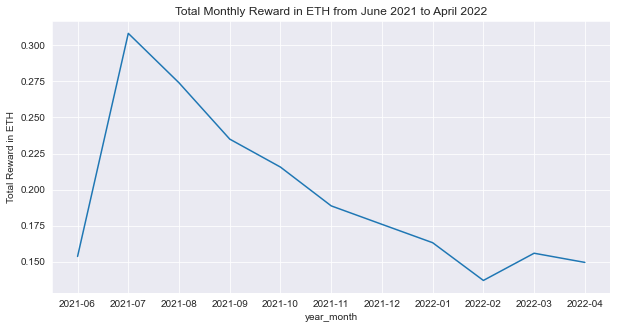

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_summary_eth['total']).set(title='Total Monthly Reward in ETH from June 2021 to April 2022',
                                               label='year_month',ylabel='Total Reward in ETH')
plt.show()

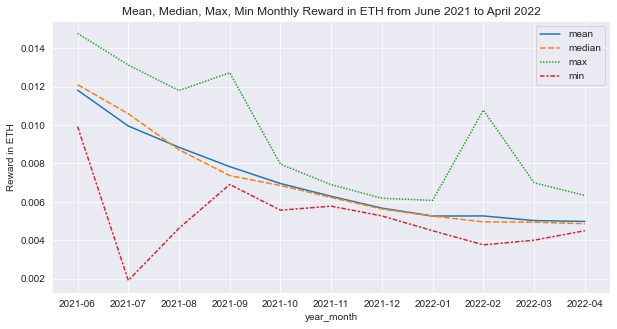

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_summary_eth[['mean','median','max','min']]).set(title='Mean, Median, Max, Min Monthly Reward in ETH from June 2021 to April 2022',
                                               label='year_month',ylabel='Reward in ETH')
plt.show()

#### Monthly Reward in USD

In [30]:
df_summary_usd = df.pivot_table(index='year_month', values='total_reward_usd', 
                            aggfunc=['sum','mean','median','max','min']).reset_index().sort_values(by='year_month')

In [31]:
df_summary_usd.columns=['year_month','total','mean','median','max','min']

In [32]:
df_summary_usd.set_index('year_month', drop=True, inplace=True)

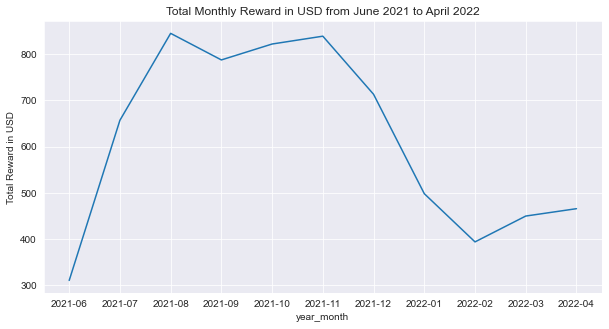

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(markers=True, data=df_summary_usd['total']).set(title='Total Monthly Reward in USD from June 2021 to April 2022',
                                               label='year_month',ylabel='Total Reward in USD')
plt.show()

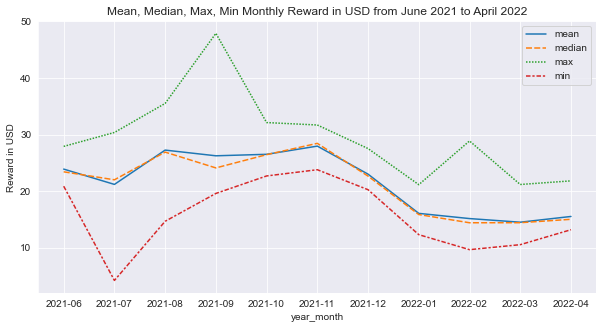

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_summary_usd[['mean','median','max','min']]).set(title='Mean, Median, Max, Min Monthly Reward in USD from June 2021 to April 2022',
                                               label='year_month',ylabel='Reward in USD')
plt.show()